#Train Model SVM (Support Vector Machine)

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import joblib

In [ ]:
import sklearn
print(sklearn.__version__)


1.3.2


In [ ]:
import pandas as pd
import numpy as np
data2 = pd.read_csv("Thyroid_Diff_Clean.csv")

In [ ]:
data2.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,34,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,30,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,62,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
X = data2.drop('Recurred', axis=1)
y = data2['Recurred']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svc = SVC()

svc_param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
}

In [ ]:
model2 = GridSearchCV(svc, svc_param_grid, n_jobs=-1, cv=3)
model2.fit(X_train, y_train)

In [ ]:
print("Best parameters for SVC: ", model2.best_params_)

Best parameters for SVC:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


#Evaluate Model SVM


In [ ]:
svc_best_model = model2.best_estimator_
y_pred = svc_best_model.predict(X_test)
target_names = ['NO','YES']  # ระบุชื่อของคลาสที่ใช้ในการรายงาน
print("Classification report for SVC:\n", classification_report(y_test, y_pred, target_names=target_names))

Classification report for SVC:
               precision    recall  f1-score   support

          NO       0.98      1.00      0.99        58
         YES       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Best cross-validation score: {model2.best_score_ * 100:.2f}%')

Accuracy: 98.70%
Best cross-validation score: 95.10%


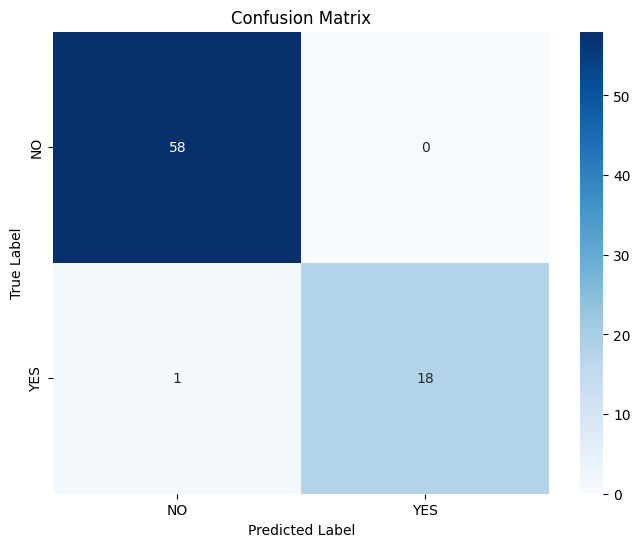

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix2 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# บันทึกโมเดล SVM ที่ดีที่สุดลงไฟล์
joblib.dump(svc_best_model, 'best_model_SVM.pkl')

['best_model_SVM.pkl']